In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data_dir = '/n/netscratch/pehlevan_lab/Lab/mgk/schema/cb_data_glr'

beta_vals = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
seeds = 100
trials = 50
mtype = 'res'  # 'sym' or 'res'
usenmc = False

stochlearn = True
glr = 1e-4

digtimes = np.zeros((len(beta_vals), seeds, 6))
totlats = np.zeros((len(beta_vals), seeds, trials + 6))

for b,beta in enumerate(beta_vals):
    for s in range(seeds):

        try:
            if mtype == 'sym':
                data = np.load(f'{data_dir}/obs_{mtype}_cb{beta}_{s}s_{usenmc}nmc.npz')
            else:
                data = np.load(f'{data_dir}/obs_{mtype}_cb{beta}_{s}s_{usenmc}nmc_{stochlearn}sl_{glr}glr.npz')

            digtimes[b,s,:] = data['totdgr']
            totlats[b,s,:] = data['totlat']
            print(f"Loaded data for beta={beta}, seed={s}")
        except (FileNotFoundError, ValueError):
            # print(f"File not found: {data_dir}/obs_{mtype}_cb{beta}_{s}.npz")
            digtimes[b,s,:] = np.nan
            totlats[b,s,:] = np.nan

Loaded data for beta=0.0, seed=0
Loaded data for beta=0.0, seed=1
Loaded data for beta=0.0, seed=2
Loaded data for beta=0.0, seed=3
Loaded data for beta=0.0, seed=4
Loaded data for beta=0.0, seed=5
Loaded data for beta=0.0, seed=6
Loaded data for beta=0.0, seed=7
Loaded data for beta=0.0, seed=8
Loaded data for beta=0.0, seed=9
Loaded data for beta=0.0, seed=10
Loaded data for beta=0.0, seed=11
Loaded data for beta=0.0, seed=12
Loaded data for beta=0.0, seed=13
Loaded data for beta=0.0, seed=14
Loaded data for beta=0.0, seed=15
Loaded data for beta=0.0, seed=16
Loaded data for beta=0.0, seed=17
Loaded data for beta=0.0, seed=18
Loaded data for beta=0.0, seed=19
Loaded data for beta=0.0, seed=20
Loaded data for beta=0.0, seed=21
Loaded data for beta=0.0, seed=22
Loaded data for beta=0.0, seed=23
Loaded data for beta=0.0, seed=24
Loaded data for beta=0.0, seed=25
Loaded data for beta=0.0, seed=26
Loaded data for beta=0.0, seed=27
Loaded data for beta=0.0, seed=28
Loaded data for beta=0.0

[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]
[100 100 100 100 100 100 100 100 100 100 100]


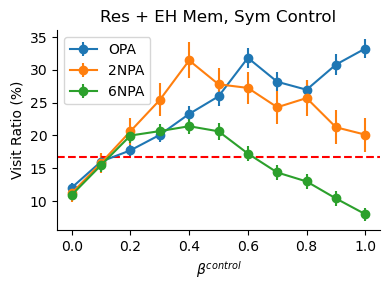

In [18]:
# plot digrate vs beta

ctype = 'Neural' if usenmc else 'Sym'
ptype = 'EH' if stochlearn else 'LMS'

if mtype =='res':
    title = f'{mtype.capitalize()} + {ptype} Mem, {ctype} Control'
else:
    title = f'{mtype.capitalize()} Mem, {ctype} Control'

labels = ['OPA','2NPA','6NPA']
plt.figure(figsize=(4,3))
for i, label in enumerate(labels):
    num_non_nan = np.sum(~np.isnan(digtimes[:,:,i+3]), axis=1)
    print(num_non_nan)
    plt.errorbar(beta_vals, np.nanmean(digtimes[:,:,i+3], axis=1), yerr=np.nanstd(digtimes[:,:,i+3], axis=1)/np.sqrt(num_non_nan), fmt='-o', label=label)
plt.xlabel('$\\beta^{control}$')
plt.ylabel('Visit Ratio (%)')
plt.title(title)
# remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(y=100/6, color='r', linestyle='--')
plt.legend()
plt.tight_layout()
# plt.grid()

if mtype =='res':
    plt.savefig(f'./figs/obs_{mtype}_{ctype}_{ptype}_dig_vs_beta_{glr}glr.pdf',bbox_inches='tight')
else:
    plt.savefig(f'./figs/obs_{mtype}_{ctype}_{ptype}_dig_vs_beta.pdf',bbox_inches='tight')